<a href="https://colab.research.google.com/github/soyab266/100-days-of-machine-learning/blob/main/knn_classifier%20with%20input%20ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [127]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


In [107]:
df=pd.read_csv('/content/Social_Network_Ads.csv')

In [108]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [109]:
x=df.iloc[:,2:4].values# .values to convert into np array

In [110]:
x.shape

(400, 2)

In [111]:
y=df.iloc[:,-1].values

In [112]:
y.shape

(400,)

In [131]:
x_train, x_test,y_train,y_test= train_test_split(x, y, test_size=0.20)

In [132]:
x_train.shape

(320, 2)

In [133]:
x_test.shape

(80, 2)

In [134]:
scaler=StandardScaler()# using because salary columns are having big values
x_train=scaler.fit_transform(x_train)

In [191]:
x_train

array([[-0.98571511, -1.46068648],
       [ 0.04295883, -0.57284361],
       [-1.45329417, -0.18811171],
       [-0.70516767,  1.11405783],
       [ 0.13647464, -0.80960171],
       [-0.98571511, -1.54947077],
       [ 0.88460113, -1.46068648],
       [ 0.79108532, -0.30649076],
       [-0.79868348, -0.24730123],
       [ 0.32350626, -1.16473886],
       [ 0.32350626,  0.52216258],
       [-0.42462023, -1.22392838],
       [ 1.44569601,  0.07824115],
       [-1.82735742,  0.37418877],
       [ 0.79108532, -0.83919647],
       [ 2.10030669, -0.80960171],
       [ 1.16514857, -0.98717028],
       [ 2.10030669, -1.04635981],
       [-0.23758861, -0.6616279 ],
       [ 1.3521802 ,  0.61094687],
       [ 0.32350626, -0.54324885],
       [ 0.41702207,  0.01905163],
       [ 1.3521802 ,  2.3866326 ],
       [ 0.13647464,  1.91311641],
       [ 0.22999045, -0.24730123],
       [-0.98571511,  0.4333783 ],
       [-1.54680998, -0.0401379 ],
       [-0.70516767, -1.54947077],
       [-0.23758861,

In [190]:

x_test=scaler.transform(x_test)
x_test

array([[-3.51536991, -2.05259254],
       [-3.53286032, -2.05256277],
       [-3.57658636, -2.05252423],
       [-3.41042743, -2.05256539],
       [-3.51536991, -2.05252248],
       [-3.68152885, -2.05259692],
       [-3.47164388, -2.0525724 ],
       [-3.41917263, -2.0525251 ],
       [-3.45415346, -2.05252072],
       [-3.4978795 , -2.05258028],
       [-3.31423015, -2.05260218],
       [-3.48038908, -2.05257328],
       [-3.67278364, -2.0525759 ],
       [-3.59407677, -2.05261006],
       [-3.53286032, -2.05258554],
       [-3.42791784, -2.05261619],
       [-3.54160553, -2.05262057],
       [-3.53286032, -2.05257853],
       [-3.53286032, -2.05260919],
       [-3.59407677, -2.05253474],
       [-3.31423015, -2.05260568],
       [-3.58533157, -2.0526013 ],
       [-3.48038908, -2.05259692],
       [-3.6290576 , -2.0525943 ],
       [-3.39293701, -2.05262232],
       [-3.55035074, -2.05260481],
       [-3.51536991, -2.05258028],
       [-3.56784115, -2.05258028],
       [-3.51536991,

In [125]:
np.sqrt(x_train.shape[0]) # k=17 first method to find the value of k

17.88854381999832

In [129]:
k=17

knn = KNeighborsClassifier(n_neighbors=k)

In [137]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=17)

In [138]:
y_pred=knn.predict(x_test)

In [139]:
y_pred.shape

(80,)

In [140]:
y_test.shape

(80,)

In [142]:
from sklearn.metrics import accuracy_score

In [143]:
accuracy_score(y_test,y_pred)

0.925

In [145]:
from sklearn.metrics import confusion_matrix # second method to get the value of k
confusion_matrix(y_test,y_pred)

array([[48,  4],
       [ 2, 26]])

In [151]:
accuracy=[]
for i in range(1,27):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  accuracy.append(accuracy_score(y_test,y_pred ))


In [150]:
len(accuracy)

26

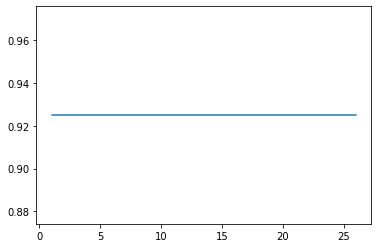

In [156]:
plt.plot(range(1,27),accuracy)

In [157]:
k=11 # third method trail and error
knn=KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [159]:
y_pred=knn.predict(x_test)

In [160]:
y_pred.shape

(80,)

In [187]:
def predict_output():
  age=int(input('enter your age'))
  salary=int(input('enter your salary'))
  x_new=np.array([[age],[salary]]).reshape(1,2)
  x_new=scaler.transform(x_new)
  return knn.predict(x_new)


In [188]:
predict_output()


enter your age20
enter your salary30000


array([0])